# Import

**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

**importing the datasets**

In [ ]:
dataset = pd.read_csv('jobfair_train.csv')
test_set = pd.read_csv('jobfair_test.csv')

# Initial Preprocesing

In [ ]:
'''Dynamic_Payment_Segment'''
new_dynamic = {'0) NonPayer': 0, '1) ExPayer': 1, '2) Minnow': 2, '3) Dolphin': 3, '4) Whale': 4}
dataset['dynamic_payment_segment'] = dataset['dynamic_payment_segment'].map(new_dynamic)
#print(dataset['dynamic_payment_segment'][:40])

'''Global_Competition_Level'''
dataset['global_competition_level'].fillna(0, inplace = True)
#print(dataset['global_competition_level'][:40])

# Data analysis

In this section I will analize dataset to find some hidden patterns if possible, correlations between the features, also there is always room for some visualisation

## Features analysis

**season**

In [ ]:
if min(list(dataset['season'])) == max(list(dataset['season'])):
    print("All season identifiers in train_set are the same: ", dataset['season'][0])

if min(list(test_set['season'])) == max(list(test_set['season'])):
    print("All season identifiers in train_set are the same: ", test_set['season'][0])

All season identifiers in train_set are the same:  173
All season identifiers in train_set are the same:  174


In [ ]:
'''Season'''
dataset.drop('season', axis = 1, inplace=True)
print(dataset.shape)

(55314, 22)


**club_id**

In [ ]:
if dataset['club_id'].nunique() == dataset.shape[0] and test_set['club_id'].nunique() == test_set.shape[0]:
    print('All of club_ids are unique in train set and in a test set as assumed')

All of club_ids are unique in train set and in a test set as assumed


In [ ]:
print("Number of clubs in train_set is: ", dataset.shape[0])
print("Number of clubs in test_set is: ", test_set.shape[0])

Number of clubs in train_set is:  55314
Number of clubs in test_set is:  60270


In [ ]:
print("There are: ", len(set(dataset['club_id']).intersection(set(test_set['club_id']))),\
      "club_ids that are in both train_set and test_set")

There are:  32219 club_ids that are in both train_set and test_set


**leaque_id**

In [ ]:
if dataset['league_id'].nunique() != dataset.shape[0]:
    print("Of ", dataset.shape[0], " different players in trainset there are: ", \
          dataset['league_id'].nunique(), " unique league ids")
    print("So for every League in train set there is exactly", \
          dataset.shape[0]//dataset['league_id'].nunique(), "differnt clubs in train set")
if test_set['league_id'].nunique() != test_set.shape[0]:
    print("Of ", test_set.shape[0], " different players in test set there are: ", \
          test_set['league_id'].nunique(), " unique league ids")
    print("So for every League in test set there is exactly", \
          test_set.shape[0]//test_set['league_id'].nunique(), "differnt clubs in test set")

Of  55314  different players in trainset there are:  3951  unique league ids
So for every League in train set there is exactly 14 differnt clubs in train set
Of  60270  different players in test set there are:  4305  unique league ids
So for every League in test set there is exactly 14 differnt clubs in test set


In [ ]:
print("There are: ", len(set(dataset['league_id']).intersection(set(test_set['league_id']))),\
      "league_ids that are in both train_set and test_set")

There are:  0 league_ids that are in both train_set and test_set


In [ ]:
correlation_value = dataset['league_id'].corr(dataset['cohort_season'])
print("Correlation between league_id and cohort_season:", correlation_value)
correlation_value = dataset['league_id'].corr(dataset['club_id'])
print("Correlation between league_id and club_id:", correlation_value)
correlation_value = dataset['league_id'].corr(dataset['avg_stars_top_11_players'])
print("Correlation between league_id and avg_stars_top_11_players:", correlation_value)

correlation_matrix_train = dataset[['league_id', 'club_id', 'cohort_season']].corr()
print("\n", correlation_matrix_train)

correlation_matrix_test = test_set[['league_id', 'club_id', 'cohort_season']].corr()
print("\n\n", correlation_matrix_test)

Correlation between league_id and cohort_season: 0.6101893493652649
Correlation between league_id and club_id: -0.6792753282626042
Correlation between league_id and avg_stars_top_11_players: 0.6286586987295248

                league_id   club_id  cohort_season
league_id       1.000000 -0.679275       0.610189
club_id        -0.679275  1.000000      -0.922520
cohort_season   0.610189 -0.922520       1.000000


                league_id   club_id  cohort_season
league_id       1.000000 -0.680858       0.607993
club_id        -0.680858  1.000000      -0.921527
cohort_season   0.607993 -0.921527       1.000000


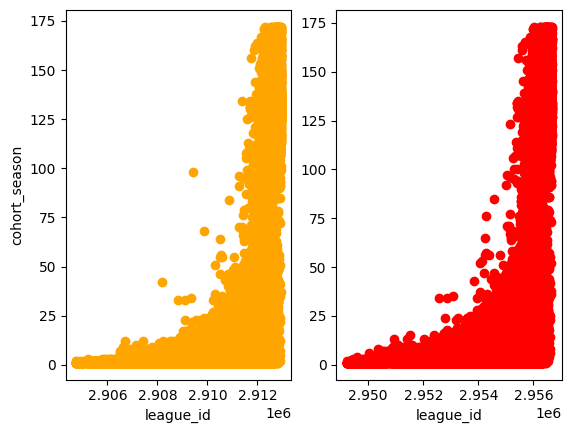

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(dataset['league_id'], dataset['cohort_season'], c = 'orange')
plt.xlabel('league_id')
plt.ylabel('cohort_season')
plt.subplot(1, 2, 2)
plt.scatter(test_set['league_id'], test_set['cohort_season'], c = 'red')
plt.xlabel('league_id')
plt.show()

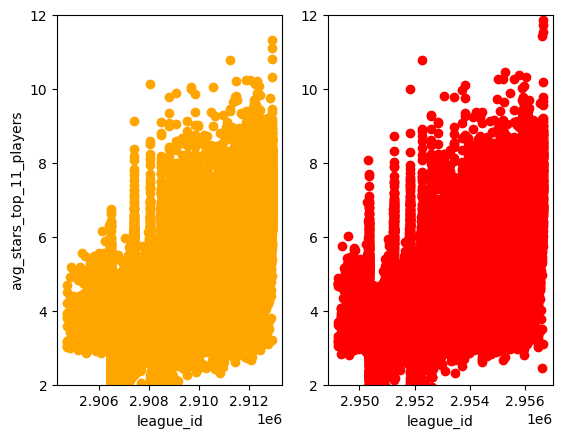

In [ ]:
plt.subplot(1,2,1)
plt.scatter(dataset['league_id'], dataset['avg_stars_top_11_players'], c = 'orange')
plt.ylim([2, 12])
plt.xlabel('league_id')
plt.ylabel('avg_stars_top_11_players')
plt.subplot(1,2,2)
plt.scatter(test_set['league_id'], test_set['avg_stars_top_11_players'], c = 'red')
plt.ylim([2, 12])
plt.xlabel('league_id')
plt.show()

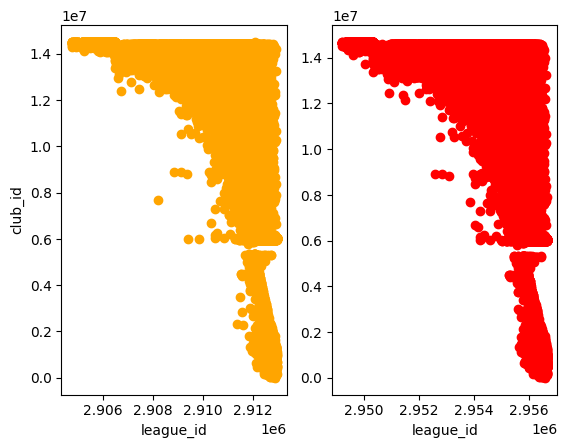

In [ ]:
plt.subplot(1,2,1)
plt.scatter(dataset['league_id'], dataset['club_id'], c = 'orange')
plt.xlabel('league_id')
plt.ylabel('club_id')
plt.subplot(1,2,2)
plt.scatter(test_set['league_id'], test_set['club_id'], c = 'red')
plt.xlabel('league_id')
plt.show()

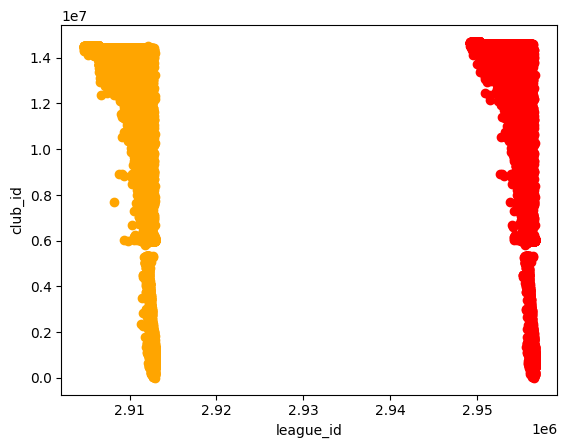

In [ ]:
plt.scatter(dataset['league_id'], dataset['club_id'], c = 'orange')
plt.xlabel('league_id')
plt.ylabel('club_id')
plt.scatter(test_set['league_id'], test_set['club_id'], c = 'red')
plt.show()

We see that new league_ids are generated at beggining of every season.

**dynamic_payment_segment**

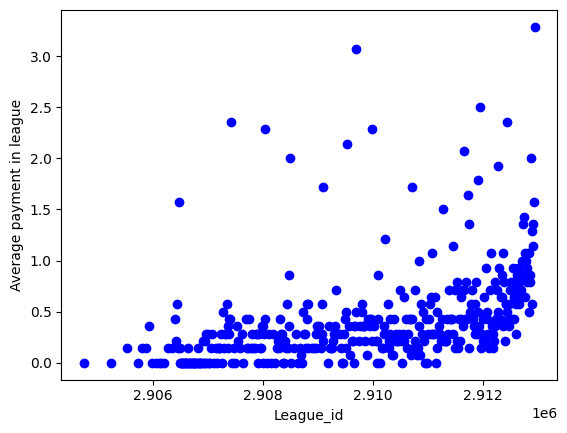

In [ ]:
dataset_temp = dataset.sort_values(by='league_id')

def league_id_graf(data):
    y_axis = [0] * int(len(data) / 14)
    for i in range(int(len(data)/14)):
        y_axis[i] = np.mean((data[i*14:(i+1)*14]))

    return y_axis

#every 10th league for better visual
plt.scatter(dataset_temp['league_id'].unique()[::10],league_id_graf(dataset_temp['dynamic_payment_segment'])[::10], c = 'blue')
plt.xlabel("League_id")
plt.ylabel("Average payment in league")
plt.show()

We see that in the leagues with higher league_ids people on average spend more money in game than in leagues with lower league_ids. Also there are corelation between cohort_season and league_id and there are many more strong corelations with league id.

This all means that the bigger is league_id the better that league is.

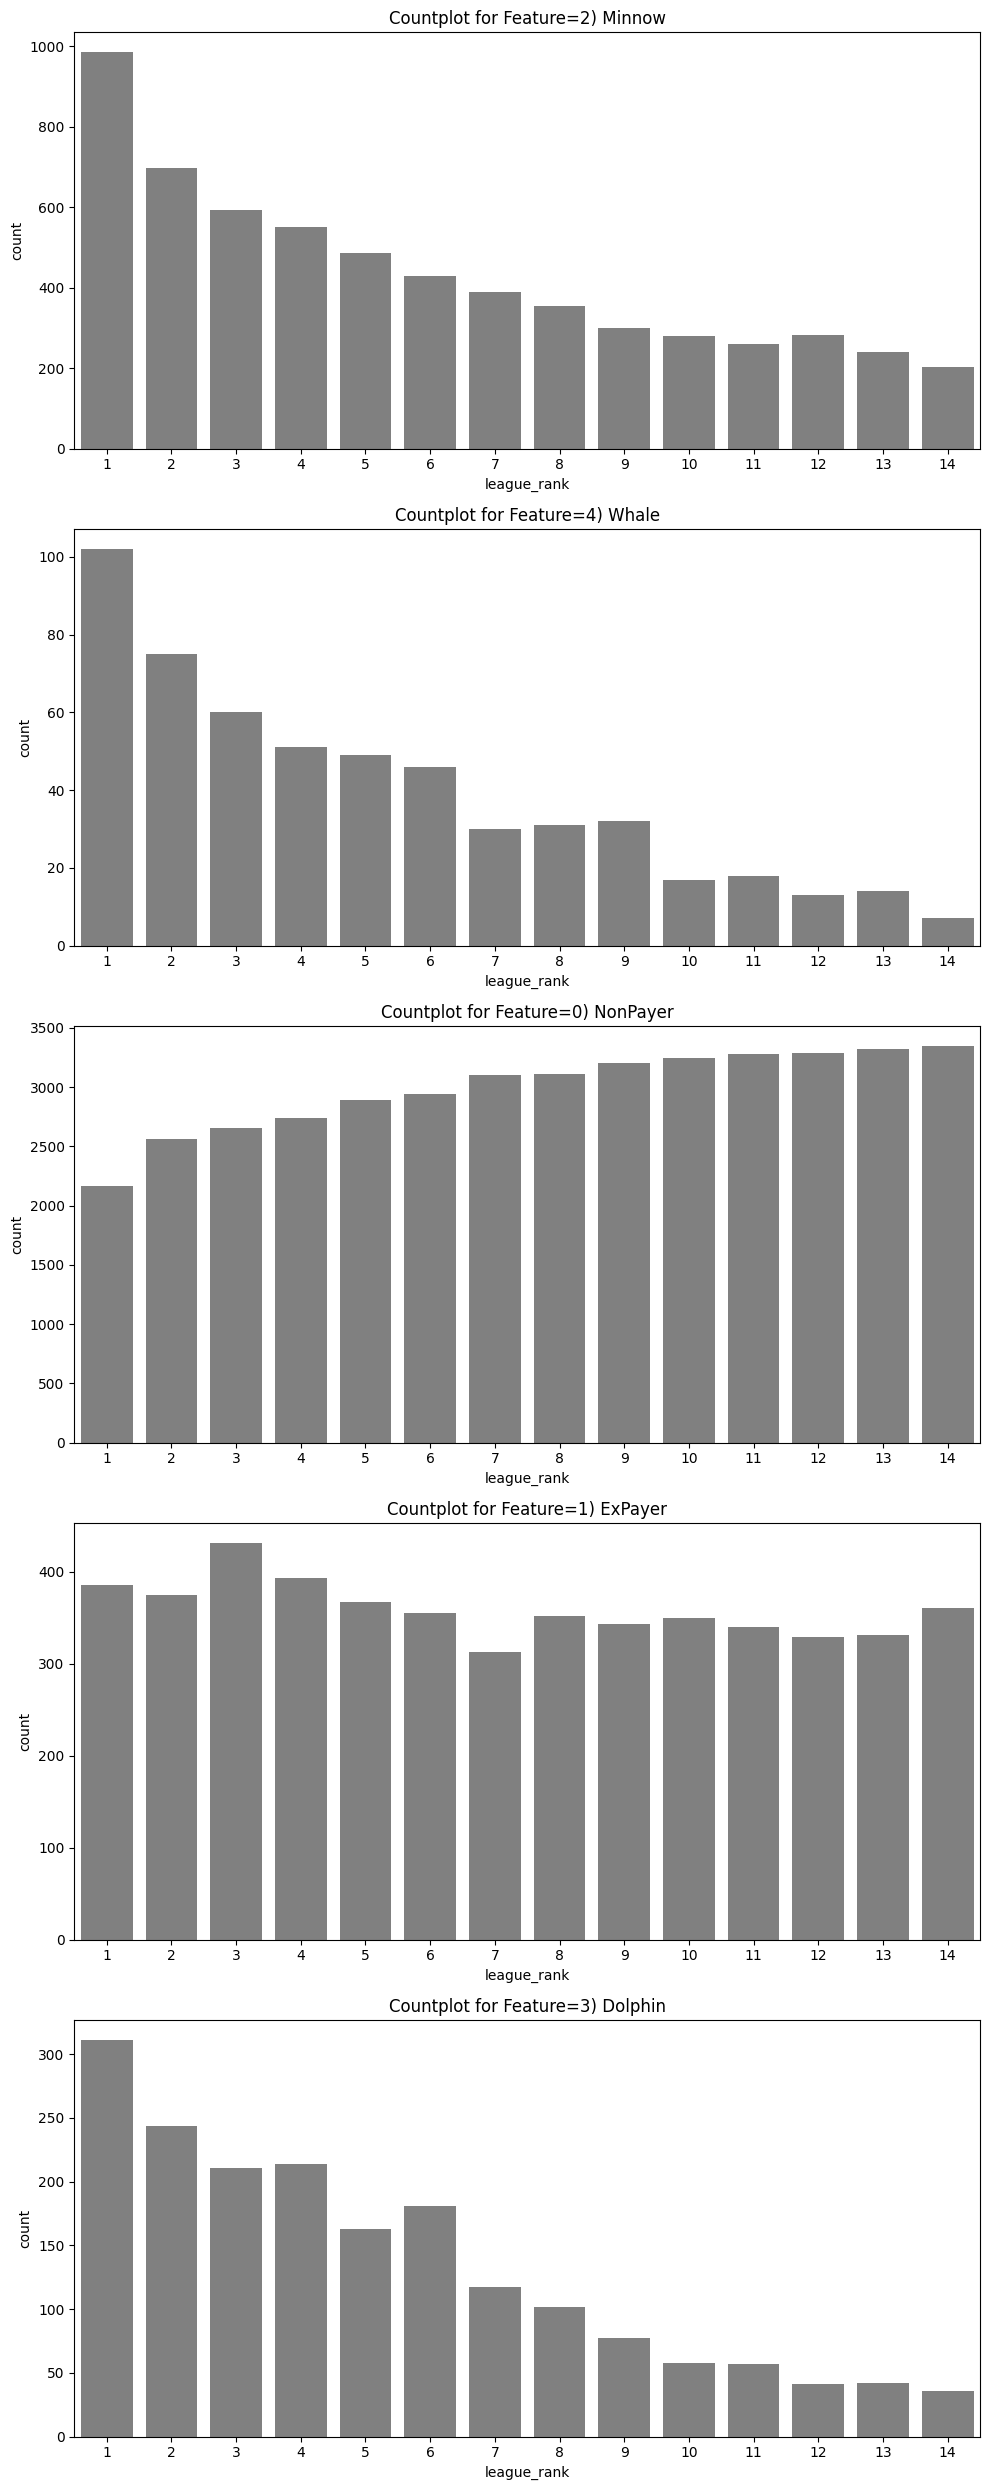

In [ ]:
import seaborn as sns
dataset_tmp = pd.read_csv('jobfair_train.csv')
feature_values = dataset_tmp['dynamic_payment_segment'].unique()
fig, axes = plt.subplots(nrows=len(feature_values), ncols=1, figsize=(10, 5 * len(feature_values)))
for i, feature_value in enumerate(feature_values):
    # Subset the DataFrame for the current feature value
    subset_df = dataset_tmp[dataset_tmp['dynamic_payment_segment'] == feature_value]

    # Create a countplot for the target values
    sns.countplot(x='league_rank', data=subset_df, ax=axes[i], color='gray')

    # Set plot title
    axes[i].set_title(f'Countplot for Feature={feature_value}')

plt.tight_layout()
plt.show()

**Global competition level**

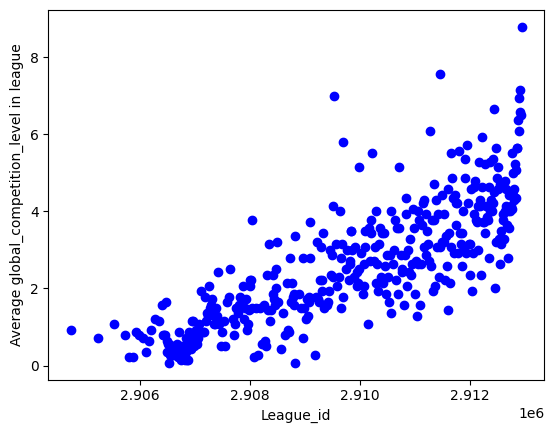

In [ ]:
#every 10th league for better visual
plt.scatter(dataset_temp['league_id'].unique()[::10],league_id_graf(dataset_temp['global_competition_level'])[::10], c = 'blue')
plt.xlabel("League_id")
plt.ylabel("Average global_competition_level in league")
plt.show()

# Heavy preprocessing

In this segment I will take care of categorical data

## Adding columns for categorical data

**Registration Country** and **Registration Platform** columns are categorical features

In this subsection I will add new columns that will represent Countries and Platformes numerically

In [ ]:
print("Number of features: ", dataset.shape[1], "\n")

specific_columns = ['registration_country', 'registration_platform_specific']
print(dataset.loc[:10, specific_columns], "\n")

count_platforms = dataset['registration_platform_specific'].nunique()
count_platforms_test = test_set['registration_platform_specific'].nunique()
count_countries = dataset['registration_country'].nunique()
count_countries_test = test_set['registration_country'].nunique()

print("Number of different platforms in dataset: ", count_platforms)
print(dataset['registration_platform_specific'].unique(), "\n")
print("Number of different platforms in testset: ", count_platforms_test)
print(test_set['registration_platform_specific'].unique(), "\n")

print("Number of different countries in dataset: ", count_countries)
print("Number of different countries in testset:", count_countries_test)
#print(dataset['registration_country'].unique())
#print(test_set['registration_country'].unique())

Number of features:  22 

   registration_country registration_platform_specific
0              Portugal                Flash FB Canvas
1                Turkey                  Android Phone
2               Belgium                Flash FB Canvas
3              Malaysia                  Android Phone
4                 Italy                      iOS Phone
5                 Italy                      iOS Phone
6              Cambodia                      iOS Phone
7             Indonesia                  Android Phone
8               Algeria                  Android Phone
9                 Spain                  Android Phone
10               Turkey                 Android Tablet 

Number of different platforms in dataset:  11
['Flash FB Canvas' 'Android Phone' 'iOS Phone' 'Android Tablet'
 'iOS Tablet' 'UniversalWindows PC' 'WebGL FB Canvas' 'WebGL TE Site'
 'WebGL or Flash FB Canvas' 'Flash TE Site' 'WebGL or Flash TE Site'] 

Number of different platforms in testset:  11
['iOS Phone' '

Registration Platforms are same for test and train set

In [ ]:
countries_count = dataset['registration_country'].value_counts().head(20)
#print(countries_count, "\n")

countries_count_test = test_set['registration_country'].value_counts().head(20)
#print(countries_count_test)

if set(countries_count.index.tolist()) == set(countries_count_test.index.tolist()):
    print("Top 20 most frequevent Countries are same for Train and Test set")
print(countries_count, "\n")

Top 20 most frequevent Countries are same for Train and Test set
Indonesia                 9830
Turkey                    4563
Brazil                    3080
Germany                   2722
France                    2144
Thailand                  2096
United Kingdom            1924
Italy                     1872
Serbia                    1589
Spain                     1584
Poland                    1395
Malaysia                  1243
Greece                    1153
Romania                   1052
United States             1007
Argentina                  999
Egypt                      970
Portugal                   697
Czech Republic             674
Bosnia and Herzegovina     653
Name: registration_country, dtype: int64 



**Registration Country**

There is too many different options for Registration Country (186 options)


I will pick only 20 most frequevent, and others will be represented with only zeroes

In [ ]:
top_20_countries = [x for x in dataset.registration_country.value_counts().head(20).index]
#print(top_20_countries)

Now I will expand my dataset with top 20 countries and also delete Registration Country column

In [ ]:
for label in top_20_countries:
    dataset[label] = np.where(dataset['registration_country'] == label, 1, 0)

In [ ]:
print(dataset[['registration_country'] + top_20_countries].head(1))

  registration_country  Indonesia  Turkey  Brazil  Germany  France  Thailand  \
0             Portugal          0       0       0        0       0         0   

   United Kingdom  Italy  Serbia  ...  Poland  Malaysia  Greece  Romania  \
0               0      0       0  ...       0         0       0        0   

   United States  Argentina  Egypt  Portugal  Czech Republic  \
0              0          0      0         1               0   

   Bosnia and Herzegovina  
0                       0  

[1 rows x 21 columns]


In [ ]:
dataset = dataset.drop('registration_country', axis=1)
#print(dataset.loc[:0, 'morale_boosters_stash':'Bosnia and Herzegovina'])
print(dataset.shape)

(55314, 41)


**Registration Platform**

There is only 11 different platform, so I will include 10 of them in expanded dataset to avoid dummy variable trap

In [ ]:
platforms = list(dataset['registration_platform_specific'].unique())[:10]
#print(platforms)

In [ ]:
for label in platforms:
    dataset[label] = np.where(dataset['registration_platform_specific'] == label, 1, 0)

In [ ]:
print(dataset[['registration_platform_specific'] + platforms].head(1))

  registration_platform_specific  Flash FB Canvas  Android Phone  iOS Phone  \
0                Flash FB Canvas                1              0          0   

   Android Tablet  iOS Tablet  UniversalWindows PC  WebGL FB Canvas  \
0               0           0                    0                0   

   WebGL TE Site  WebGL or Flash FB Canvas  Flash TE Site  
0              0                         0              0  


In [ ]:
dataset = dataset.drop('registration_platform_specific', axis=1)

Look of dataset now:

In [ ]:
print(dataset.shape)
print(dataset.columns)
#print(dataset.head(1))

(55314, 50)
Index(['club_id', 'league_id', 'dynamic_payment_segment', 'cohort_season',
       'avg_age_top_11_players', 'avg_stars_top_11_players',
       'avg_stars_top_14_players', 'avg_training_factor_top_11_players',
       'days_active_last_28_days', 'league_match_watched_count_last_28_days',
       'session_count_last_28_days', 'playtime_last_28_days',
       'league_match_won_count_last_28_days', 'training_count_last_28_days',
       'global_competition_level', 'tokens_spent_last_28_days', 'tokens_stash',
       'rests_stash', 'morale_boosters_stash', 'league_rank', 'Indonesia',
       'Turkey', 'Brazil', 'Germany', 'France', 'Thailand', 'United Kingdom',
       'Italy', 'Serbia', 'Spain', 'Poland', 'Malaysia', 'Greece', 'Romania',
       'United States', 'Argentina', 'Egypt', 'Portugal', 'Czech Republic',
       'Bosnia and Herzegovina', 'Flash FB Canvas', 'Android Phone',
       'iOS Phone', 'Android Tablet', 'iOS Tablet', 'UniversalWindows PC',
       'WebGL FB Canvas', 'WebG

# Potential results analysis

In [ ]:
from sklearn.metrics import mean_absolute_error
def MAX_MAE():
    l1 = list(range(14))
    l2 = l1[::-1]
    max_error = mean_absolute_error(l1, l2)
    print(max_error)

MAX_MAE()

7.0


In [ ]:
def average_MAE_error():
    repetition = 1000
    sum = 0
    for i in range(repetition):
        random_permutation1 = np.random.permutation(np.arange(1, 14 + 1))
        random_permutation2 = np.random.permutation(np.arange(1, 14 + 1))
        temp = mean_absolute_error(random_permutation1, random_permutation2)
        sum+=temp
    print("Average MAE error: ", sum/repetition)

average_MAE_error()

Average MAE error:  4.622285714285709


In [ ]:
def safe_MAE_error():
    repetition = 1000
    sum = 0
    for i in range(repetition):
        random_permutation1 = np.random.permutation(np.arange(1, 14 + 1))
        random_permutation2 = np.random.choice(a = [7, 8], size = 14,  p = [0.5, 0.5])
        temp = mean_absolute_error(random_permutation1, random_permutation2)
        sum+=temp
    print("Average MAE error: ", sum/repetition)

safe_MAE_error()

Average MAE error:  3.5015000000000014
